In [21]:
# imports
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [28]:
# general settings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
sns.set_theme(style="darkgrid")

In [2]:
datasets = list()
# open zipped file
with zipfile.ZipFile("Data/Chicago_Crime_2001-2022.zip") as z:
    # get file names
    crime_files = z.namelist()
    # load and add datasets 
    for file in crime_files:
        with z.open(file) as f:
            datasets.append(pd.read_csv(f))
# combine datasets
df_crimes = pd.concat(datasets)

In [44]:
df_crimes.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16,nan,41.957850,-87.749185
1,2001-01-01 13:00:00,BATTERY,SIMPLE,RESIDENCE,False,True,825,8,nan,41.783892,-87.684841
2,2001-01-01 13:00:00,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3,nan,41.780412,-87.611970
3,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24,nan,42.012391,-87.678032
4,2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2,nan,41.819538,-87.620020


In [4]:
# drop "ID" column
df_crimes.drop(columns="ID", inplace=True)

In [5]:
print(df_crimes.shape)
df_crimes.info()

(7713109, 11)
<class 'pandas.core.frame.DataFrame'>
Index: 7713109 entries, 0 to 238857
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Date                  object 
 1   Primary Type          object 
 2   Description           object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              float64
 8   Ward                  float64
 9   Latitude              float64
 10  Longitude             float64
dtypes: bool(2), float64(4), int64(1), object(4)
memory usage: 603.2+ MB


In [6]:
# change formats and dtypes
df_crimes[["District", "Ward"]] = df_crimes[["District", "Ward"]].map(lambda x: f"{x:.0f}")
df_crimes["Date"] = pd.to_datetime(df_crimes["Date"])

In [7]:
# categorical feature cardinals
cat_cols = df_crimes.select_dtypes(object).columns
for c in cat_cols:
    print(f"- {c}: {len(df_crimes[c].unique())}")

- Primary Type: 36
- Description: 547
- Location Description: 216
- District: 25
- Ward: 51


In [8]:
dict_dfs = dict()
crime_types = df_crimes["Primary Type"].unique()
for t in crime_types:
    df_temp = df_crimes[df_crimes["Primary Type"]==t][["Date","Primary Type"]]
    df_temp = df_temp.set_index("Date").resample("H").size()
    dict_dfs[t] = df_temp

In [9]:
# create a dataframe for time series
df_ts = pd.DataFrame(dict_dfs).fillna(0)

In [10]:
df_ts.head()

,BATTERY,GAMBLING,CRIMINAL DAMAGE,OFFENSE INVOLVING CHILDREN,THEFT,ASSAULT,NARCOTICS,CRIM SEXUAL ASSAULT,DECEPTIVE PRACTICE,WEAPONS VIOLATION,...,RITUALISM,DOMESTIC VIOLENCE,OBSCENITY,OTHER NARCOTIC VIOLATION,PUBLIC INDECENCY,CONCEALED CARRY LICENSE VIOLATION,NON-CRIMINAL,HUMAN TRAFFICKING,NON-CRIMINAL (SUBJECT SPECIFIED),NON - CRIMINAL
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01 00:00:00,18,0.0,49,67.0,121,4,3.0,21.0,36.0,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-01-01 01:00:00,25,0.0,23,2.0,9,4,1.0,3.0,2.0,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-01-01 02:00:00,27,0.0,24,0.0,3,5,1.0,0.0,0.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-01-01 03:00:00,19,0.0,15,0.0,13,0,2.0,3.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-01-01 04:00:00,23,0.0,15,0.0,3,2,0.0,2.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, '2022 Crimes')

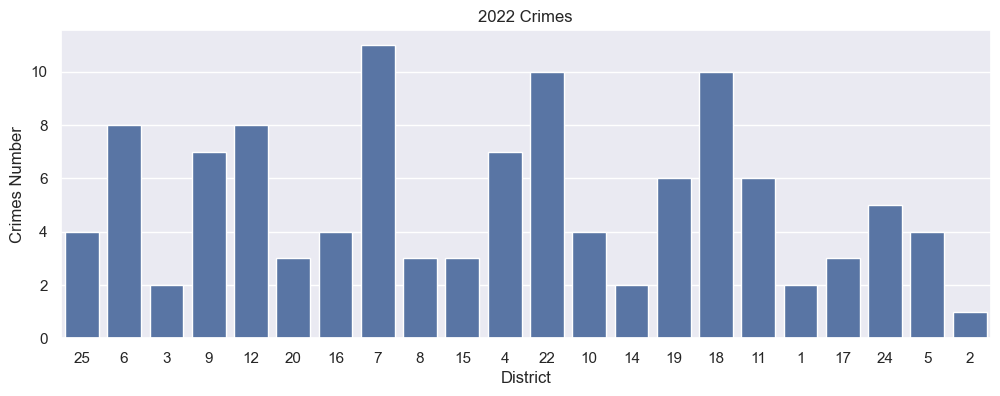

In [29]:
plt.figure(figsize=(12, 4))
df_crimes_2022 = df_crimes[df_crimes.Date=="2022"]
ax = sns.countplot(data=df_crimes_2022, x="District")
ax.set_ylabel("Crimes Number")
ax.set_title("2022 Crimes")

We see that in 2022, district 7 has the most crimes and district 2 has the least ones.

In [13]:
# create time series dataframe with year frequency  
df_years = df_ts.resample("Y").sum()
# create series with the total number of crimes each year 
df_years_total = df_years.apply(np.sum, axis=1)

Text(0.5, 1.0, 'Crimes over Years')

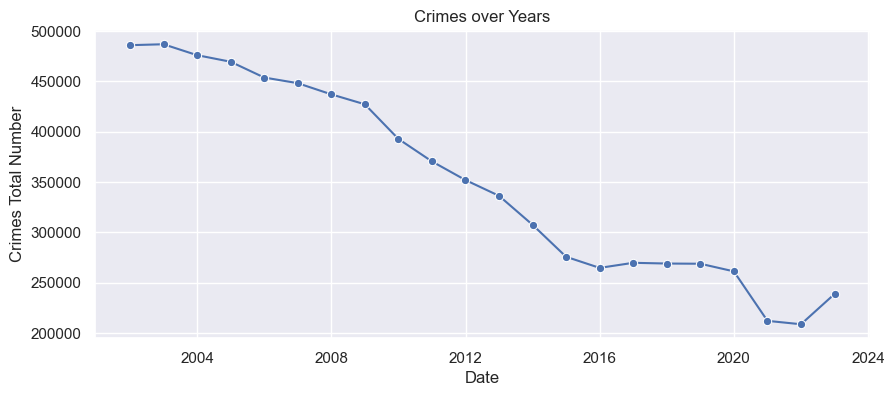

In [39]:
plt.figure(figsize=(10, 4))
ax = sns.lineplot(df_years_total, marker="o")
ax.set_ylabel("Crimes Total Number")
ax.set_title("Crimes over Years")

We see that the total number of crimes has a decreasing trend over the years 

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

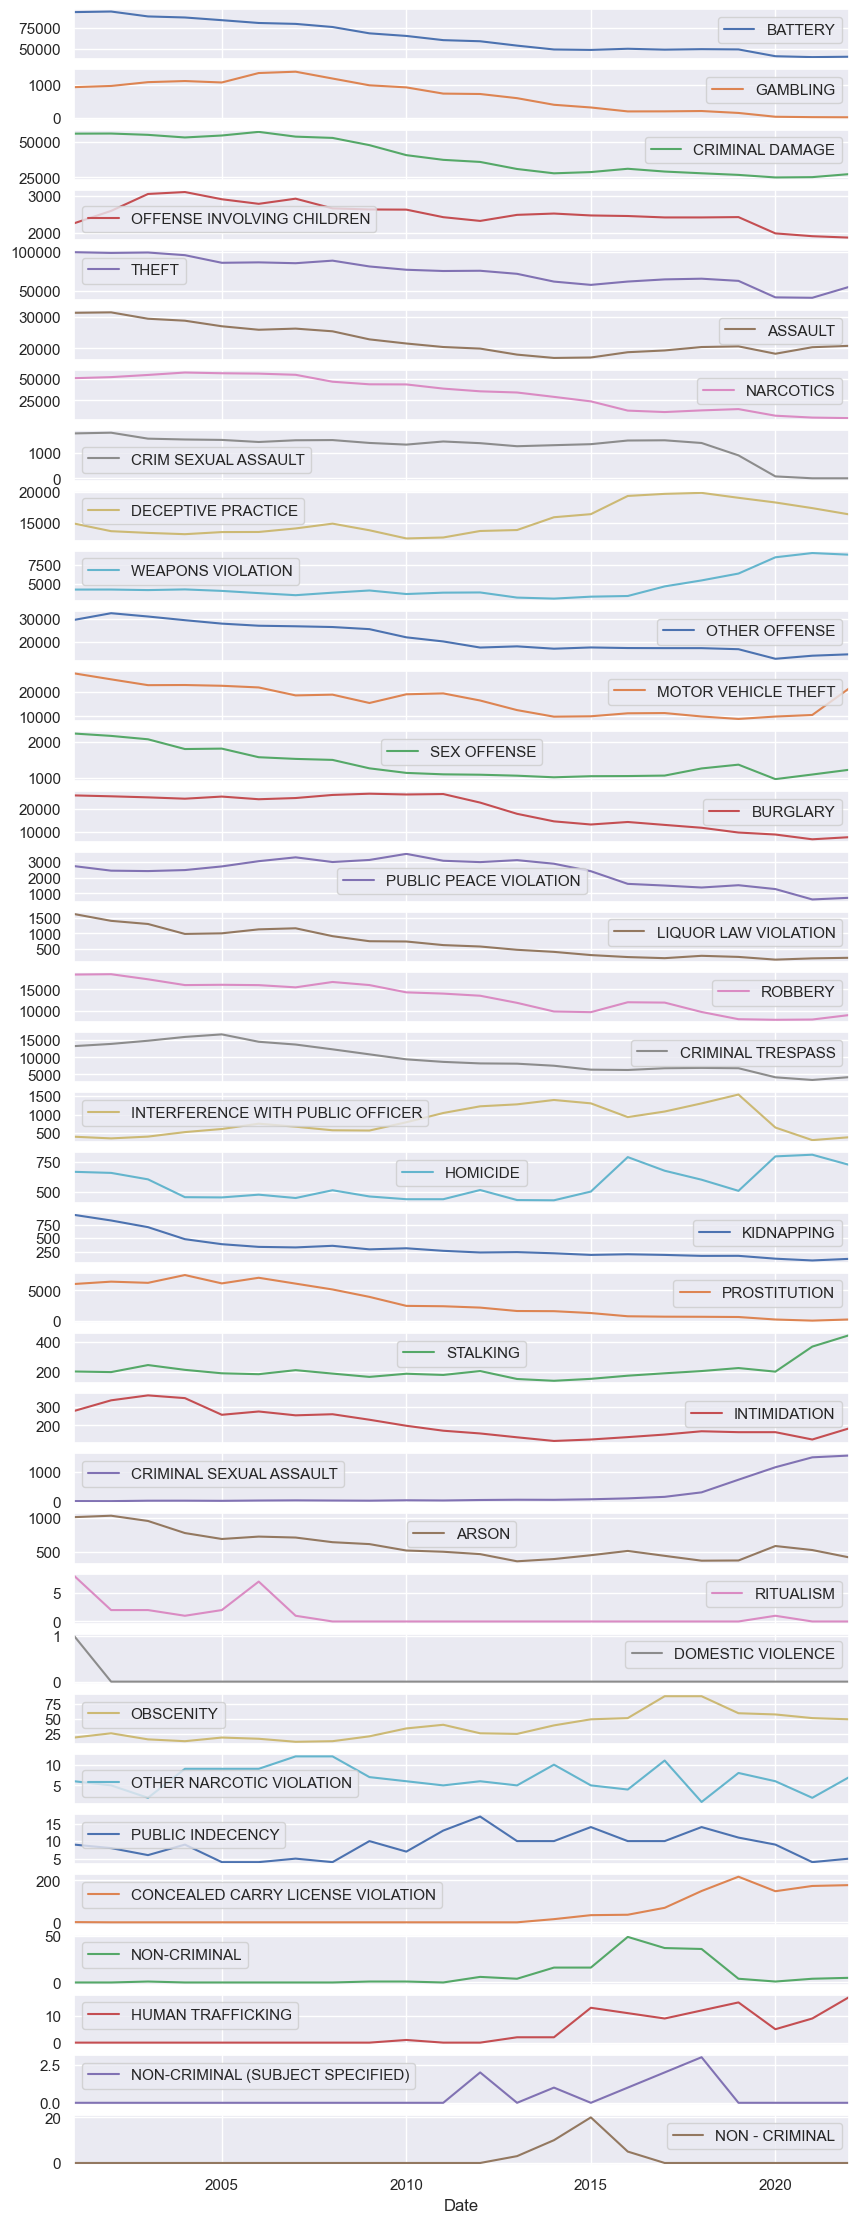

In [43]:
df_years.plot(subplots=True, figsize=(10, 28))

Despite the decreasing trend of all crimes total number the following types have an increasing tread over the years:
- deceptive practice
- weapon violation
- inference with public officer
- homicide
- stalking
- criminal sexual assault
- obscenity
- concealed carry license violation

In [50]:
# filter into only rush hours
df_ruch_hours = df_crimes[["Date", "Primary Type"]]
df_ruch_hours = df_ruch_hours[(df_ruch_hours.Date.dt.hour.isin(range(7,11))) | (df_ruch_hours.Date.dt.hour.isin(range(16,20)))]
df_ruch_hours["AM/PM"] = df_ruch_hours.Date.dt.strftime("%p")

Text(0.5, 1.0, 'Crimes in Rush Hours')

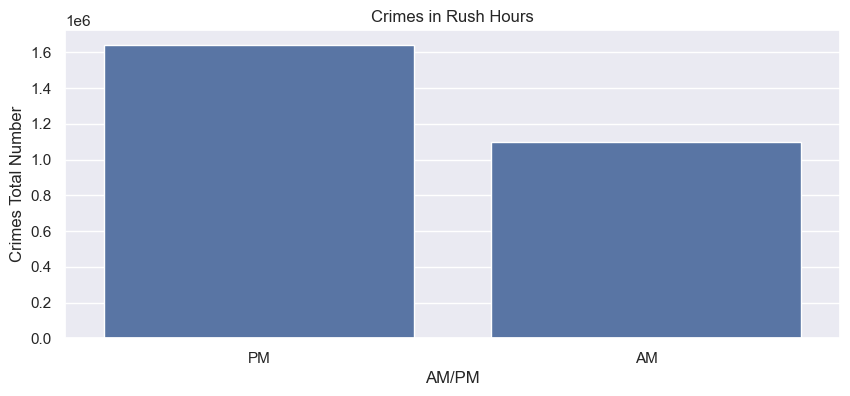

In [52]:
plt.figure(figsize=(10, 4))
ax = sns.countplot(df_ruch_hours, x="AM/PM")
ax.set_ylabel("Crimes Total Number")
ax.set_title("Crimes in Rush Hours")

Crimes are more common in PM rush houres

[Text(0, 0, 'CRIMINAL DAMAGE'),
 Text(1, 0, 'BATTERY'),
 Text(2, 0, 'THEFT'),
 Text(3, 0, 'WEAPONS VIOLATION'),
 Text(4, 0, 'MOTOR VEHICLE THEFT'),
 Text(5, 0, 'NARCOTICS'),
 Text(6, 0, 'OTHER OFFENSE'),
 Text(7, 0, 'SEX OFFENSE'),
 Text(8, 0, 'OFFENSE INVOLVING CHILDREN'),
 Text(9, 0, 'ASSAULT'),
 Text(10, 0, 'BURGLARY'),
 Text(11, 0, 'ROBBERY'),
 Text(12, 0, 'DECEPTIVE PRACTICE'),
 Text(13, 0, 'KIDNAPPING'),
 Text(14, 0, 'CRIMINAL TRESPASS'),
 Text(15, 0, 'PROSTITUTION'),
 Text(16, 0, 'CRIM SEXUAL ASSAULT'),
 Text(17, 0, 'STALKING'),
 Text(18, 0, 'HOMICIDE'),
 Text(19, 0, 'LIQUOR LAW VIOLATION'),
 Text(20, 0, 'GAMBLING'),
 Text(21, 0, 'PUBLIC PEACE VIOLATION'),
 Text(22, 0, 'ARSON'),
 Text(23, 0, 'INTIMIDATION'),
 Text(24, 0, 'INTERFERENCE WITH PUBLIC OFFICER'),
 Text(25, 0, 'OBSCENITY'),
 Text(26, 0, 'RITUALISM'),
 Text(27, 0, 'CRIMINAL SEXUAL ASSAULT'),
 Text(28, 0, 'OTHER NARCOTIC VIOLATION'),
 Text(29, 0, 'PUBLIC INDECENCY'),
 Text(30, 0, 'NON-CRIMINAL'),
 Text(31, 0, 'NON-CRIMIN

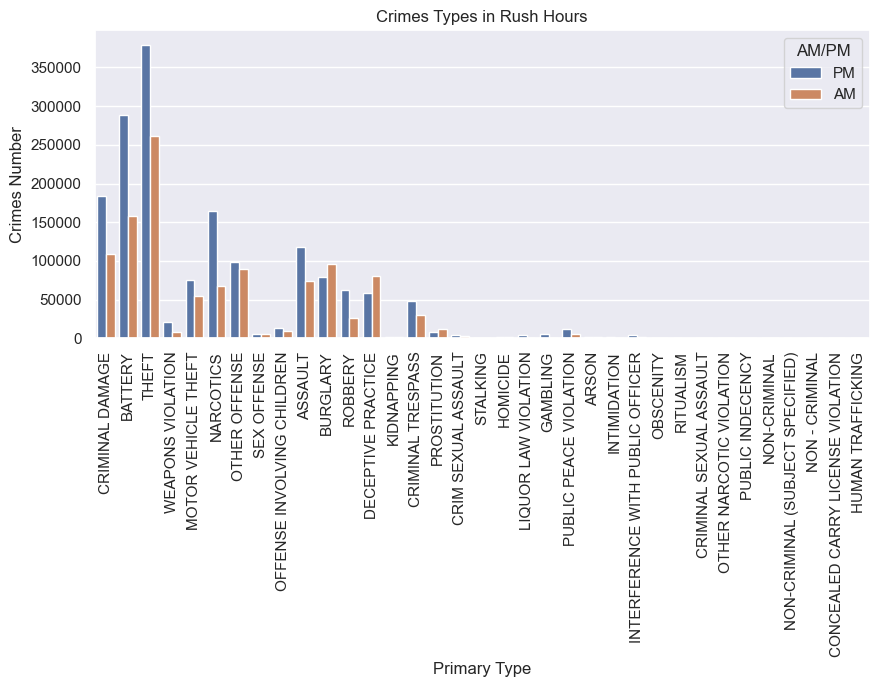

In [56]:
plt.figure(figsize=(10, 4))
ax = sns.countplot(df_ruch_hours, x="Primary Type", hue="AM/PM")
ax.set_ylabel("Crimes Number")
ax.set_title("Crimes Types in Rush Hours")
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)

The most common crimes types in AM ruch hours are:
- Criminal Damage
- Battery
- Thief
- Burglary
- Other Offense

The most common crimes types in PM ruch hours are:
- Criminal Damage
- Battery
- Thief
- Narcotics
- Assault
